### ***2023 Brain Age Predition - Maching Learning Methods***

In [5]:
import pandas as pd
import numpy as np
import sklearn
import torch

import missingno as msno

#### ***1 Load Dataset***

***This Dataset contains 13 csv files, which come from MRI scanner. Each file represents a class of metrics, including Gray volume, Surface Area etc. All data was collected from 1600 patients. The label is their Brain age.***

***This part aims to load the dataset and use pre-process methods to construct data features***

In [6]:
data_path_1 = r'data/train/lh.MeanCurv - 1600.csv'
data_path_2 = r'data/train/lh.GausCurv - 1600.csv'
data_path_3 = r'data/train/rh.MeanCurv- 1600.csv'
data_path_4 = r'data/train/rh.GausCurv- 1600.csv'

data_path_5 = r'data/train/lh.ThickAvg - 1600.csv'
data_path_6 = r'data/train/lh.SurfArea - 1600.csv'
data_path_7 = r'data/train/rh.ThickAvg- 1600.csv'
data_path_8 = r'data/train/rh.SurfArea - 1600.csv'

data_path_9 = r'data/train/lh.GrayVol - 1600.csv'
data_path_10 = r'data/train/rh.GrayVol- 1600.csv'

data_path_11 = r'data/train/wmparc - 1600.csv'
data_path_12 = r'data/train/aseg - 1600.csv'

label_path = r'data/train/subject_info - 1600.csv'

original_x1, original_x2, original_x3, original_x4, original_y = pd.read_csv(data_path_1), pd.read_csv(data_path_2), pd.read_csv(data_path_3), pd.read_csv(data_path_4), pd.read_csv(label_path)
original_x5, original_x6, original_x7, original_x8 = pd.read_csv(data_path_5), pd.read_csv(data_path_6), pd.read_csv(data_path_7), pd.read_csv(data_path_8)
original_x9, original_x10 = pd.read_csv(data_path_9), pd.read_csv(data_path_10)
original_x11, original_x12 = pd.read_csv(data_path_11), pd.read_csv(data_path_12)


# drop the label numbers
original_x1, original_x2, original_x3, original_x4 = original_x1.iloc[:, 1:], original_x2.iloc[:,1:], original_x3.iloc[:,1:], original_x4.iloc[:, 1:]
original_x5, original_x6, original_x7, original_x8 = original_x5.iloc[:, 1:], original_x6.iloc[:,1:], original_x7.iloc[:,1:], original_x8.iloc[:, 1:]
original_x9, original_x10 = original_x9.iloc[:, 1:], original_x10.iloc[:, 1:]
original_x11, original_x12 = original_x11.iloc[:, 1:], original_x12.iloc[:, 1:]
original_y = original_y.iloc[:, 3]

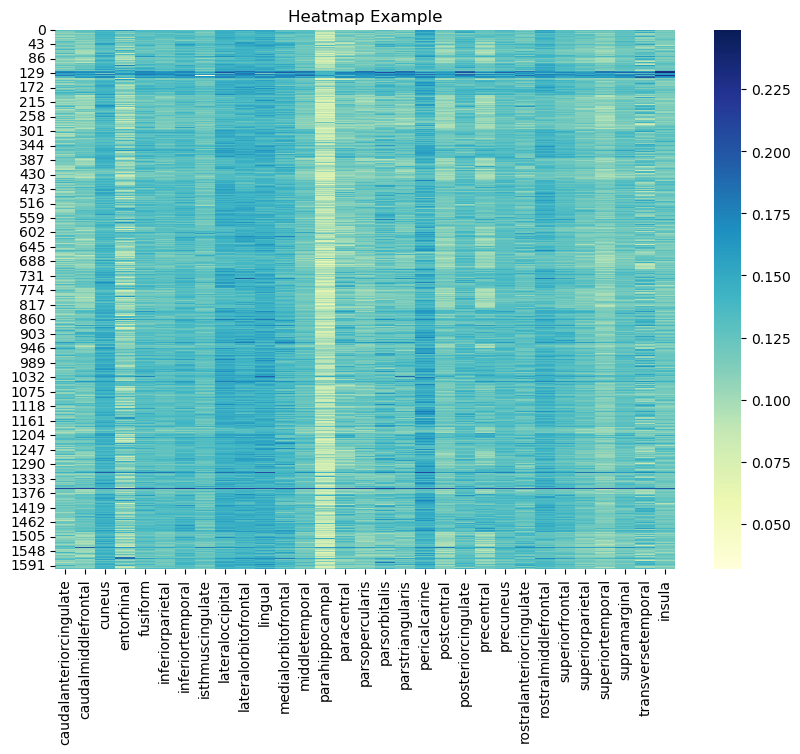

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x1, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

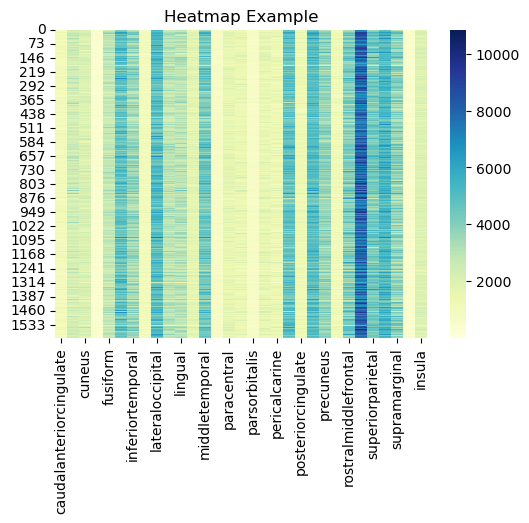

In [9]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x2, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

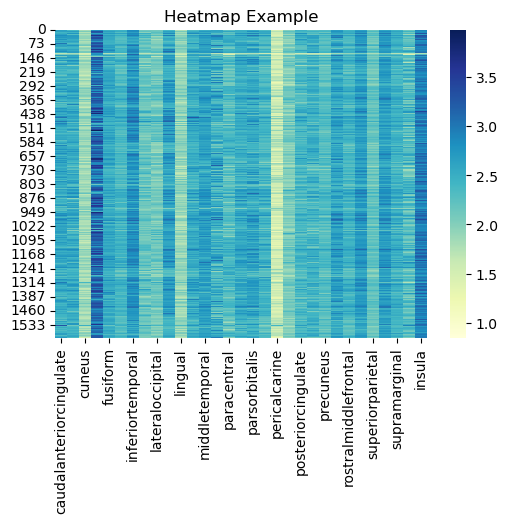

In [10]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x5, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

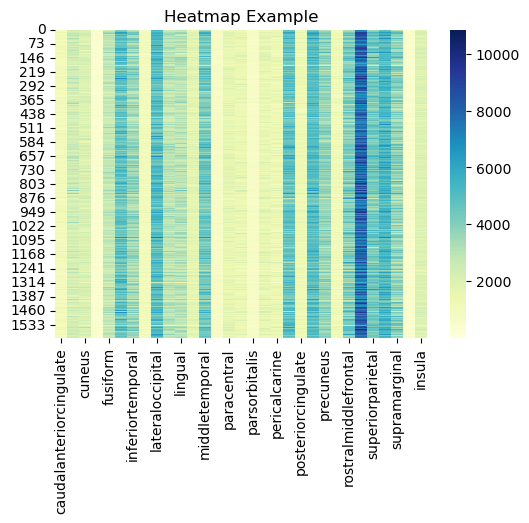

In [11]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x6, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

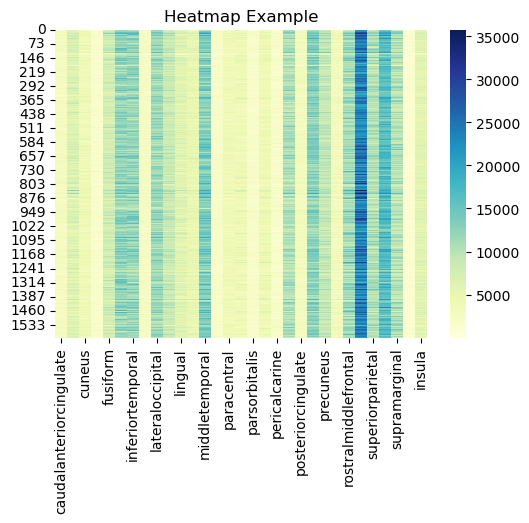

In [12]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x9, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

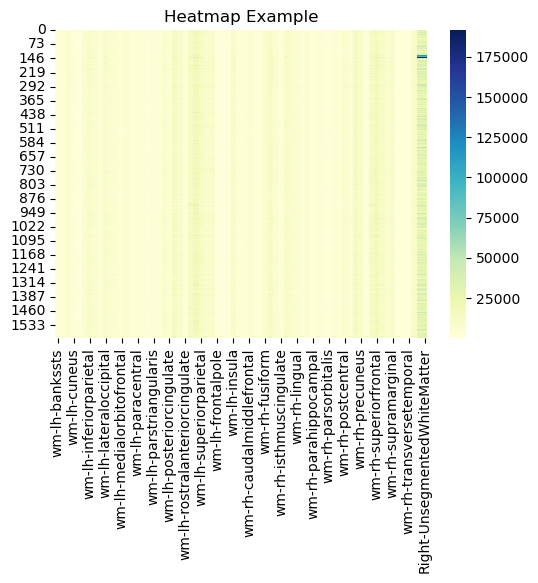

In [13]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x11, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

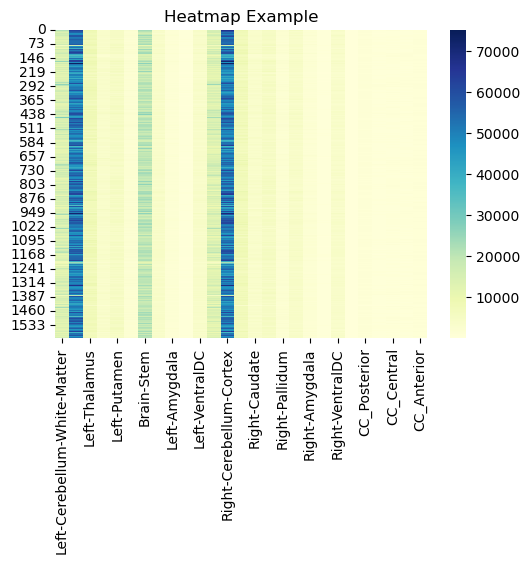

In [14]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.heatmap(original_x12, cmap="YlGnBu")
plt.title("Heatmap Example")
plt.show()

#### the above maps show that each dataframe has different distribution. So use df.describe to further analysize the distribution of each dataframe.

In [15]:
original_x1.describe()

,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,isthmuscingulate,lateraloccipital,lateralorbitofrontal,...,precentral,precuneus,rostralanteriorcingulate,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,transversetemporal,insula
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.117904,0.118501,0.141126,0.113878,0.131100,0.127877,0.135269,0.125482,0.143412,0.143268,...,0.120989,0.130669,0.128263,0.138219,0.130127,0.121773,0.113183,0.125496,0.124823,0.120886
std,0.013033,0.013411,0.009522,0.017480,0.009885,0.009329,0.009995,0.009504,0.010004,0.009171,...,0.015929,0.008916,0.011456,0.010768,0.009726,0.009978,0.010856,0.009960,0.017569,0.012264
min,0.082000,0.086000,0.099000,0.071000,0.105000,0.101000,0.110000,0.032000,0.118000,0.110000,...,0.088000,0.106000,0.078000,0.112000,0.107000,0.097000,0.090000,0.101000,0.079000,0.094000
25%,0.109000,0.109000,0.135000,0.102000,0.125000,0.122000,0.129000,0.120000,0.137000,0.137000,...,0.108000,0.125000,0.121000,0.131000,0.124000,0.115000,0.107000,0.119000,0.113000,0.114000
50%,0.117000,0.118000,0.141000,0.112000,0.131000,0.128000,0.134500,0.125000,0.143000,0.143000,...,0.122000,0.130000,0.127000,0.138000,0.130000,0.122000,0.113000,0.126000,0.125000,0.120000
75%,0.125000,0.126000,0.147000,0.124000,0.136000,0.133000,0.140000,0.131000,0.149000,0.148000,...,0.132000,0.135000,0.134000,0.145000,0.136000,0.128000,0.118000,0.131000,0.136000,0.125000
max,0.211000,0.215000,0.195000,0.214000,0.209000,0.196000,0.218000,0.186000,0.215000,0.214000,...,0.200000,0.211000,0.210000,0.204000,0.212000,0.205000,0.211000,0.198000,0.249000,0.240000


In [16]:
original_x2.describe()

,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,isthmuscingulate,lateraloccipital,lateralorbitofrontal,...,precentral,precuneus,rostralanteriorcingulate,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,transversetemporal,insula
count,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1039.696875,2375.446250,2061.879375,381.72625,2778.238125,4752.638125,3580.995625,1014.466875,5045.373750,2941.131250,...,4962.337500,3743.575000,1151.335625,4114.653125,7845.895625,4382.828750,5297.430000,3801.739375,469.270625,1961.109375
std,181.630479,393.529086,301.227096,74.17562,361.011289,700.536864,540.907942,175.948842,676.162748,393.307079,...,580.474219,502.791393,202.765256,660.377997,944.142491,629.015665,661.111433,683.187512,82.741450,200.250372
min,37.000000,1085.000000,761.000000,206.00000,1080.000000,2112.000000,1095.000000,1.000000,1667.000000,981.000000,...,1333.000000,916.000000,9.000000,2265.000000,2978.000000,1850.000000,2107.000000,133.000000,151.000000,983.000000
25%,922.750000,2090.000000,1868.000000,329.00000,2527.000000,4284.500000,3211.250000,909.000000,4590.500000,2693.000000,...,4608.500000,3418.000000,1011.750000,3658.000000,7191.000000,4007.750000,4870.750000,3332.750000,416.750000,1830.750000
50%,1029.500000,2336.500000,2055.000000,373.00000,2764.000000,4731.500000,3575.000000,1006.500000,5027.000000,2949.000000,...,4927.000000,3726.500000,1146.000000,4056.000000,7791.000000,4370.500000,5246.000000,3767.500000,464.000000,1957.000000
75%,1146.250000,2620.250000,2253.000000,423.00000,3014.250000,5194.500000,3935.250000,1107.000000,5477.000000,3207.250000,...,5303.250000,4054.000000,1279.000000,4518.000000,8476.250000,4769.000000,5682.250000,4218.250000,513.000000,2084.250000
max,1783.000000,4358.000000,3111.000000,797.00000,4020.000000,7898.000000,5405.000000,2480.000000,7503.000000,4412.000000,...,6980.000000,6190.000000,2919.000000,6607.000000,10867.000000,6853.000000,8033.000000,7187.000000,1674.000000,2882.000000


In [17]:
original_x5.describe()

,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,isthmuscingulate,lateraloccipital,lateralorbitofrontal,...,precentral,precuneus,rostralanteriorcingulate,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,transversetemporal,insula
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.534494,2.514293,1.852526,3.091196,2.546584,2.379718,2.771665,2.191712,2.109541,2.625503,...,2.421219,2.289136,2.602218,2.412436,2.683188,2.176566,2.680110,2.450261,2.271604,2.940090
std,0.190902,0.176089,0.129724,0.298750,0.142504,0.138814,0.165441,0.158634,0.143881,0.204714,...,0.181612,0.144572,0.194439,0.150547,0.163169,0.127015,0.169107,0.152229,0.222748,0.189588
min,1.026000,1.286000,1.065000,1.853000,1.477000,1.401000,1.986000,0.849000,1.394000,1.315000,...,1.291000,1.274000,1.246000,1.448000,1.653000,1.497000,1.432000,1.463000,0.864000,1.250000
25%,2.434000,2.430000,1.765750,2.924750,2.466750,2.300000,2.669000,2.098000,2.011000,2.482750,...,2.329000,2.213000,2.488000,2.323750,2.589750,2.093750,2.595000,2.368000,2.132750,2.852000
50%,2.538500,2.531000,1.855000,3.108000,2.554000,2.382000,2.783000,2.189000,2.108500,2.637000,...,2.443500,2.294500,2.607500,2.418000,2.692500,2.181000,2.687500,2.457500,2.275000,2.942500
75%,2.641250,2.616250,1.934000,3.290000,2.635000,2.470000,2.880500,2.282000,2.195000,2.758250,...,2.542000,2.376000,2.718250,2.510000,2.783000,2.260250,2.780250,2.548000,2.411250,3.047000
max,3.301000,3.104000,2.491000,3.982000,2.945000,2.842000,3.255000,2.800000,2.818000,3.314000,...,2.814000,2.673000,3.352000,2.911000,3.210000,2.532000,3.155000,2.853000,3.338000,3.556000


In [18]:
original_x6.describe()

,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,isthmuscingulate,lateraloccipital,lateralorbitofrontal,...,precentral,precuneus,rostralanteriorcingulate,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,transversetemporal,insula
count,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1039.696875,2375.446250,2061.879375,381.72625,2778.238125,4752.638125,3580.995625,1014.466875,5045.373750,2941.131250,...,4962.337500,3743.575000,1151.335625,4114.653125,7845.895625,4382.828750,5297.430000,3801.739375,469.270625,1961.109375
std,181.630479,393.529086,301.227096,74.17562,361.011289,700.536864,540.907942,175.948842,676.162748,393.307079,...,580.474219,502.791393,202.765256,660.377997,944.142491,629.015665,661.111433,683.187512,82.741450,200.250372
min,37.000000,1085.000000,761.000000,206.00000,1080.000000,2112.000000,1095.000000,1.000000,1667.000000,981.000000,...,1333.000000,916.000000,9.000000,2265.000000,2978.000000,1850.000000,2107.000000,133.000000,151.000000,983.000000
25%,922.750000,2090.000000,1868.000000,329.00000,2527.000000,4284.500000,3211.250000,909.000000,4590.500000,2693.000000,...,4608.500000,3418.000000,1011.750000,3658.000000,7191.000000,4007.750000,4870.750000,3332.750000,416.750000,1830.750000
50%,1029.500000,2336.500000,2055.000000,373.00000,2764.000000,4731.500000,3575.000000,1006.500000,5027.000000,2949.000000,...,4927.000000,3726.500000,1146.000000,4056.000000,7791.000000,4370.500000,5246.000000,3767.500000,464.000000,1957.000000
75%,1146.250000,2620.250000,2253.000000,423.00000,3014.250000,5194.500000,3935.250000,1107.000000,5477.000000,3207.250000,...,5303.250000,4054.000000,1279.000000,4518.000000,8476.250000,4769.000000,5682.250000,4218.250000,513.000000,2084.250000
max,1783.000000,4358.000000,3111.000000,797.00000,4020.000000,7898.000000,5405.000000,2480.000000,7503.000000,4412.000000,...,6980.000000,6190.000000,2919.000000,6607.000000,10867.000000,6853.000000,8033.000000,7187.000000,1674.000000,2882.000000


In [19]:
original_x9.describe()

,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,isthmuscingulate,lateraloccipital,lateralorbitofrontal,...,precentral,precuneus,rostralanteriorcingulate,rostralmiddlefrontal,superiorfrontal,superiorparietal,superiortemporal,supramarginal,transversetemporal,insula
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2808.713750,6416.460625,3976.838125,1661.298125,7807.410000,12384.912500,12195.229375,2455.844375,11716.303125,8648.991250,...,12674.832500,9198.157500,3324.898750,11374.630625,23910.193750,10398.818125,16467.953750,10061.395000,1144.632500,5899.841875
std,544.503249,1205.805036,661.173081,352.430328,1229.160311,1976.601674,1926.233960,437.584203,1739.243142,1191.035174,...,1778.786297,1346.062419,613.441662,1984.332403,3213.557465,1628.969881,2344.691695,1854.838061,230.633925,734.448905
min,64.000000,1697.000000,1019.000000,494.000000,2315.000000,3765.000000,3489.000000,1.000000,3045.000000,1198.000000,...,1654.000000,1195.000000,40.000000,4126.000000,5486.000000,3522.000000,2666.000000,213.000000,137.000000,1007.000000
25%,2454.750000,5660.500000,3554.000000,1454.750000,7022.000000,11100.000000,10945.250000,2190.750000,10597.000000,7948.750000,...,11631.750000,8382.500000,2923.000000,10051.250000,21772.750000,9434.750000,15103.250000,8819.500000,995.750000,5478.500000
50%,2770.500000,6326.500000,3965.000000,1632.000000,7770.000000,12294.000000,12185.500000,2436.000000,11680.000000,8640.500000,...,12695.500000,9190.500000,3296.500000,11137.000000,23706.500000,10373.500000,16332.000000,9965.500000,1125.000000,5867.000000
75%,3133.000000,7132.500000,4370.000000,1841.250000,8575.250000,13619.250000,13352.750000,2711.250000,12820.500000,9367.500000,...,13746.500000,10017.250000,3719.250000,12515.000000,25870.500000,11394.000000,17834.750000,11257.500000,1289.000000,6339.250000
max,5070.000000,14503.000000,6464.000000,4038.000000,13421.000000,21999.000000,19067.000000,4979.000000,19058.000000,13685.000000,...,18816.000000,14289.000000,5819.000000,20025.000000,35803.000000,16659.000000,24295.000000,16708.000000,3020.000000,9144.000000


In [20]:
original_x11.describe()

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,...,wm-rh-superiorfrontal,wm-rh-superiorparietal,wm-rh-superiortemporal,wm-rh-supramarginal,wm-rh-frontalpole,wm-rh-temporalpole,wm-rh-transversetemporal,wm-rh-insula,Left-UnsegmentedWhiteMatter,Right-UnsegmentedWhiteMatter
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2799.724000,2598.062000,6566.225625,2679.717250,920.708187,6604.040437,10200.864687,6893.245625,3741.794938,9781.892375,...,17904.347813,11685.568000,7066.422937,8677.071250,398.020812,817.45025,823.289937,9866.627875,31065.082250,31184.691687
std,607.579745,467.092035,1026.697815,481.382174,228.338868,936.529606,1654.103514,1130.494401,571.536768,1581.660410,...,2610.648066,1662.735024,1102.999013,1494.771781,79.685284,333.99801,4621.136425,6931.494084,10121.216894,9203.413945
min,844.000000,27.700000,3661.200000,1048.300000,359.000000,2452.300000,4813.300000,1813.700000,5.900000,3871.000000,...,4623.900000,4799.400000,319.600000,321.800000,217.200000,197.60000,147.100000,4608.500000,7506.000000,12217.700000
25%,2385.400000,2313.400000,5872.300000,2341.850000,753.000000,6007.500000,9073.875000,6157.875000,3404.750000,8716.325000,...,16134.550000,10588.025000,6314.775000,7745.000000,345.450000,711.72500,585.300000,8883.650000,26460.025000,26650.750000
50%,2795.150000,2562.000000,6469.200000,2670.650000,890.450000,6538.700000,10071.200000,6860.550000,3730.200000,9662.450000,...,17738.000000,11611.150000,6972.750000,8651.550000,389.950000,797.10000,660.900000,9510.450000,29925.900000,30281.650000
75%,3172.600000,2847.250000,7220.575000,2991.600000,1060.450000,7165.025000,11182.625000,7625.050000,4051.500000,10692.625000,...,19397.275000,12728.950000,7707.425000,9580.500000,442.550000,895.00000,750.400000,10265.950000,34366.600000,34525.075000
max,4893.000000,4529.300000,11982.800000,5112.000000,2058.600000,12095.800000,23529.200000,11256.500000,10002.200000,20698.800000,...,30553.100000,19770.900000,14393.300000,15745.000000,1115.300000,12509.50000,181803.100000,187165.600000,183383.400000,191537.500000


In [21]:
original_x12.describe()

,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Brain-Stem,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,...,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,14172.258625,50962.915375,7773.552000,3529.061250,4943.061875,1892.731500,19916.979250,3953.210813,1466.098250,436.383250,...,4158.645312,1664.138687,487.208438,3778.760125,188.225188,1011.073625,555.252313,676.154375,663.774125,880.095312
std,2653.937645,6284.573631,953.545151,523.249141,687.627855,255.937171,2245.356643,417.065131,217.013754,106.267543,...,454.719211,232.791774,91.321708,423.678625,44.397927,170.642034,130.094381,191.539971,183.622046,153.342859
min,5714.000000,17370.300000,3726.600000,1398.100000,1384.100000,707.200000,10067.900000,1232.200000,349.900000,125.500000,...,884.300000,370.300000,180.800000,2407.100000,17.700000,70.900000,63.500000,148.300000,281.300000,335.600000
25%,12438.525000,47115.275000,7111.950000,3194.550000,4504.925000,1722.425000,18450.975000,3680.425000,1320.875000,364.475000,...,3872.275000,1506.325000,430.375000,3504.550000,161.400000,899.850000,470.750000,525.925000,530.400000,778.600000
50%,13751.950000,50900.000000,7730.500000,3481.600000,4907.800000,1884.550000,19882.100000,3935.900000,1461.000000,432.400000,...,4147.650000,1653.000000,482.750000,3765.950000,189.200000,1001.550000,540.600000,660.900000,645.500000,867.850000
75%,15410.700000,55042.075000,8402.525000,3826.625000,5395.500000,2053.925000,21447.525000,4229.075000,1604.050000,505.625000,...,4449.675000,1811.800000,542.450000,4059.000000,214.600000,1113.625000,621.125000,799.275000,778.000000,966.625000
max,28415.800000,73108.400000,10916.100000,5939.300000,7541.800000,3059.900000,26892.300000,6568.500000,2242.700000,861.700000,...,5876.100000,2530.600000,848.500000,5674.400000,388.300000,1894.500000,1216.100000,1499.300000,1500.700000,1662.100000


<Axes: >

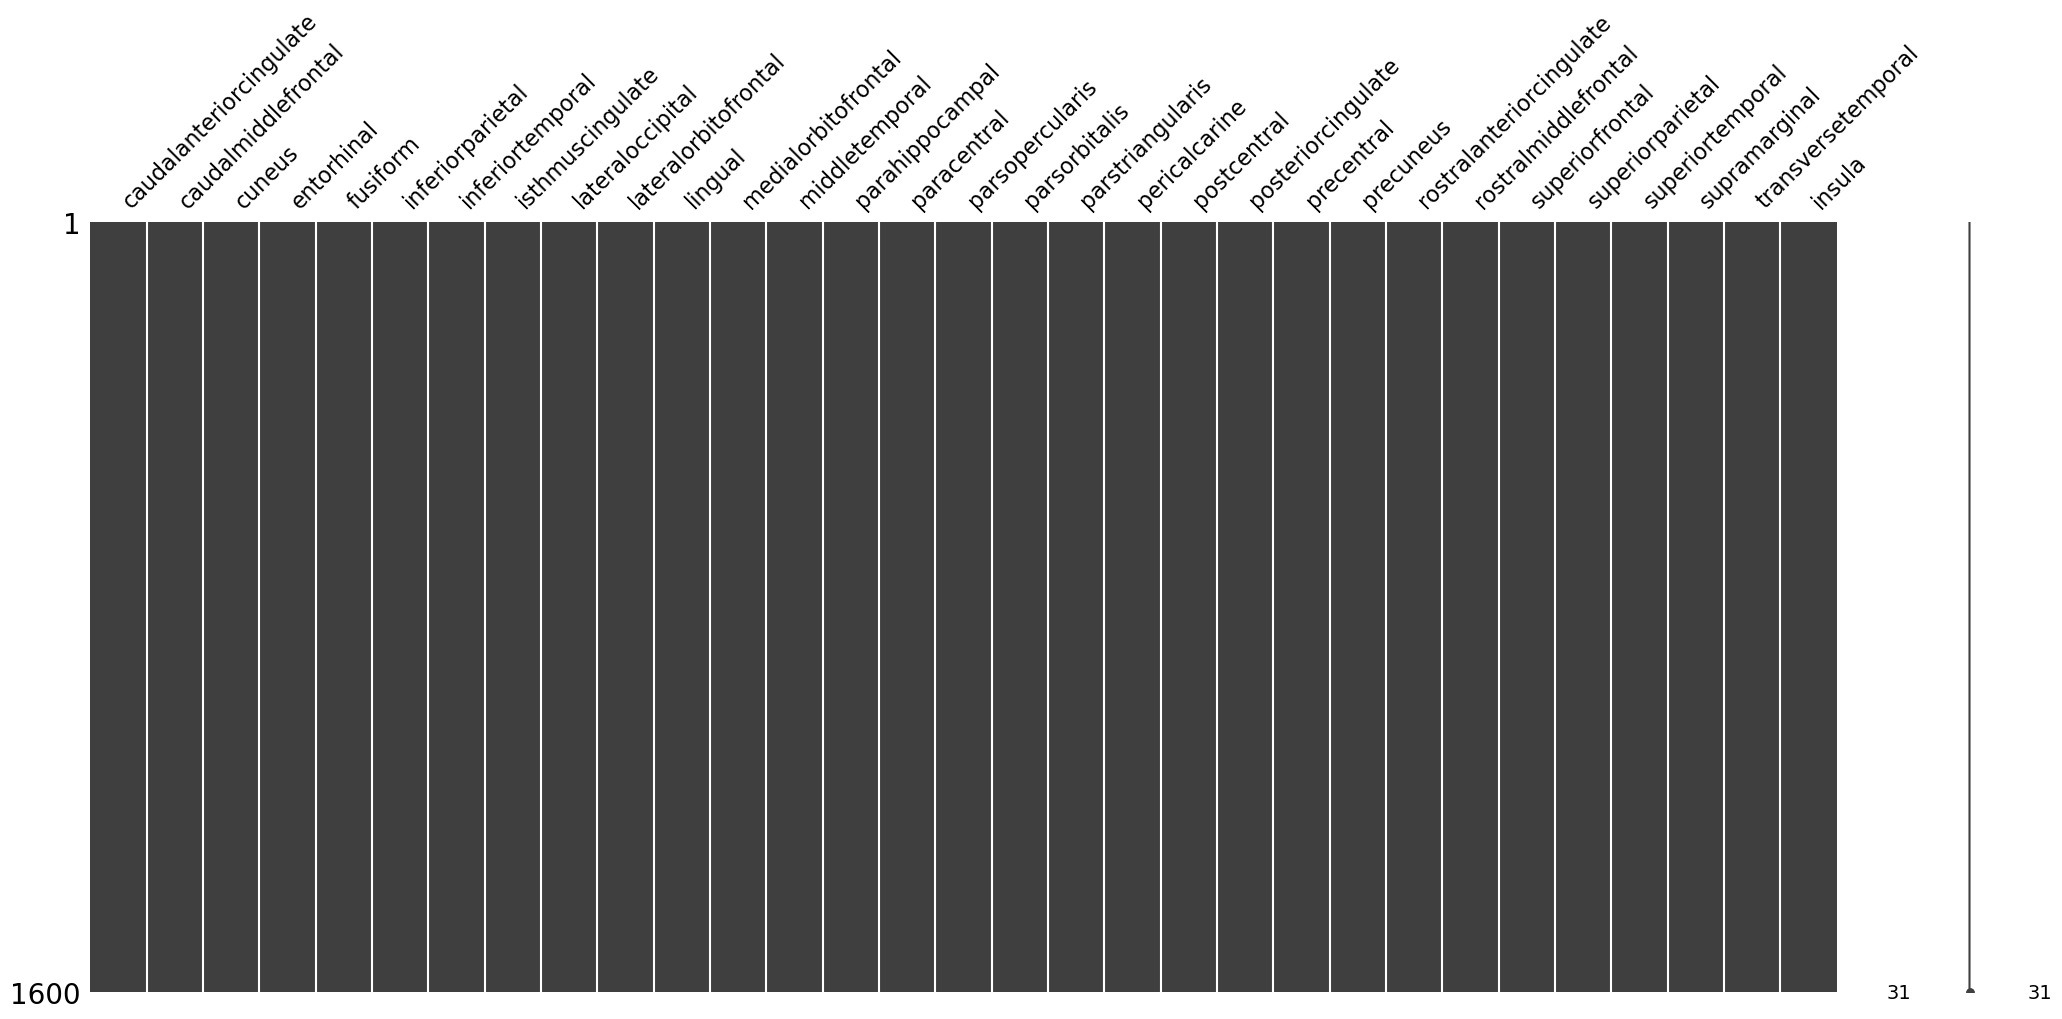

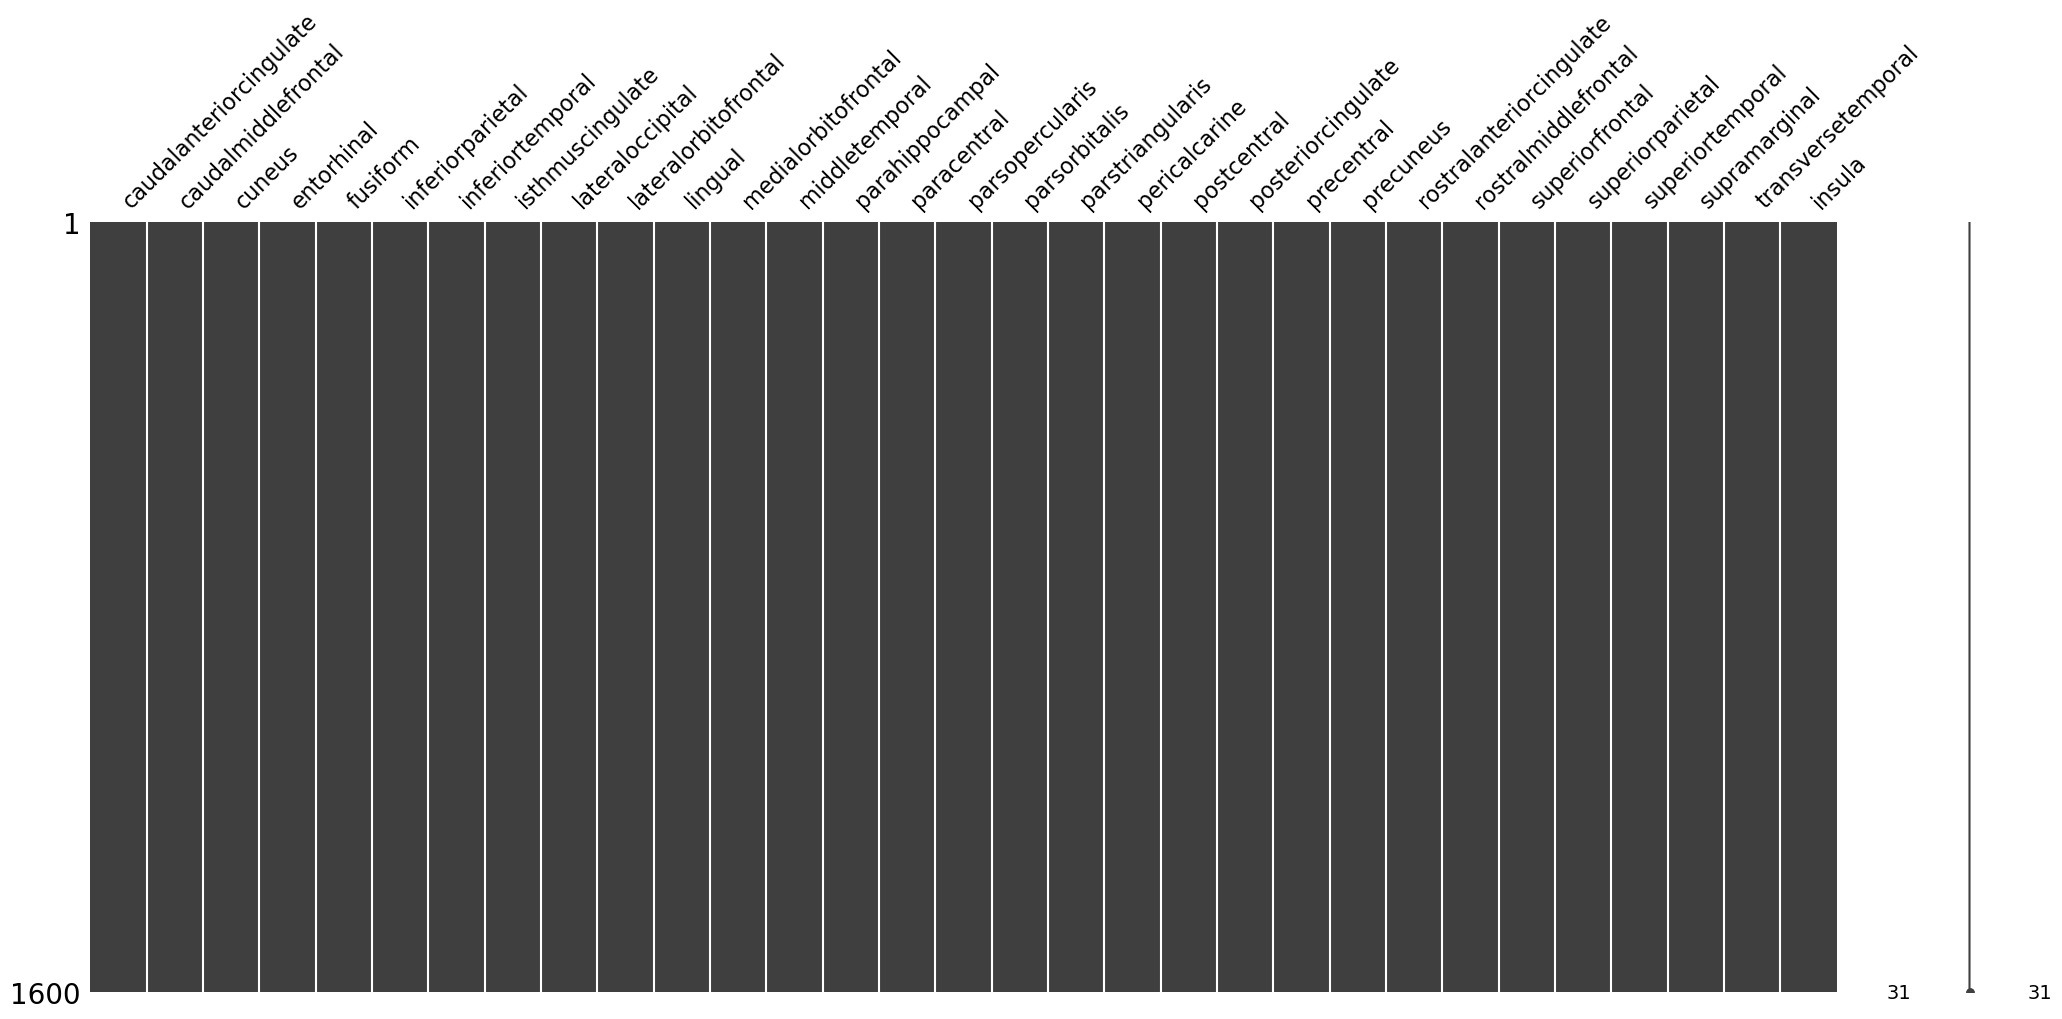

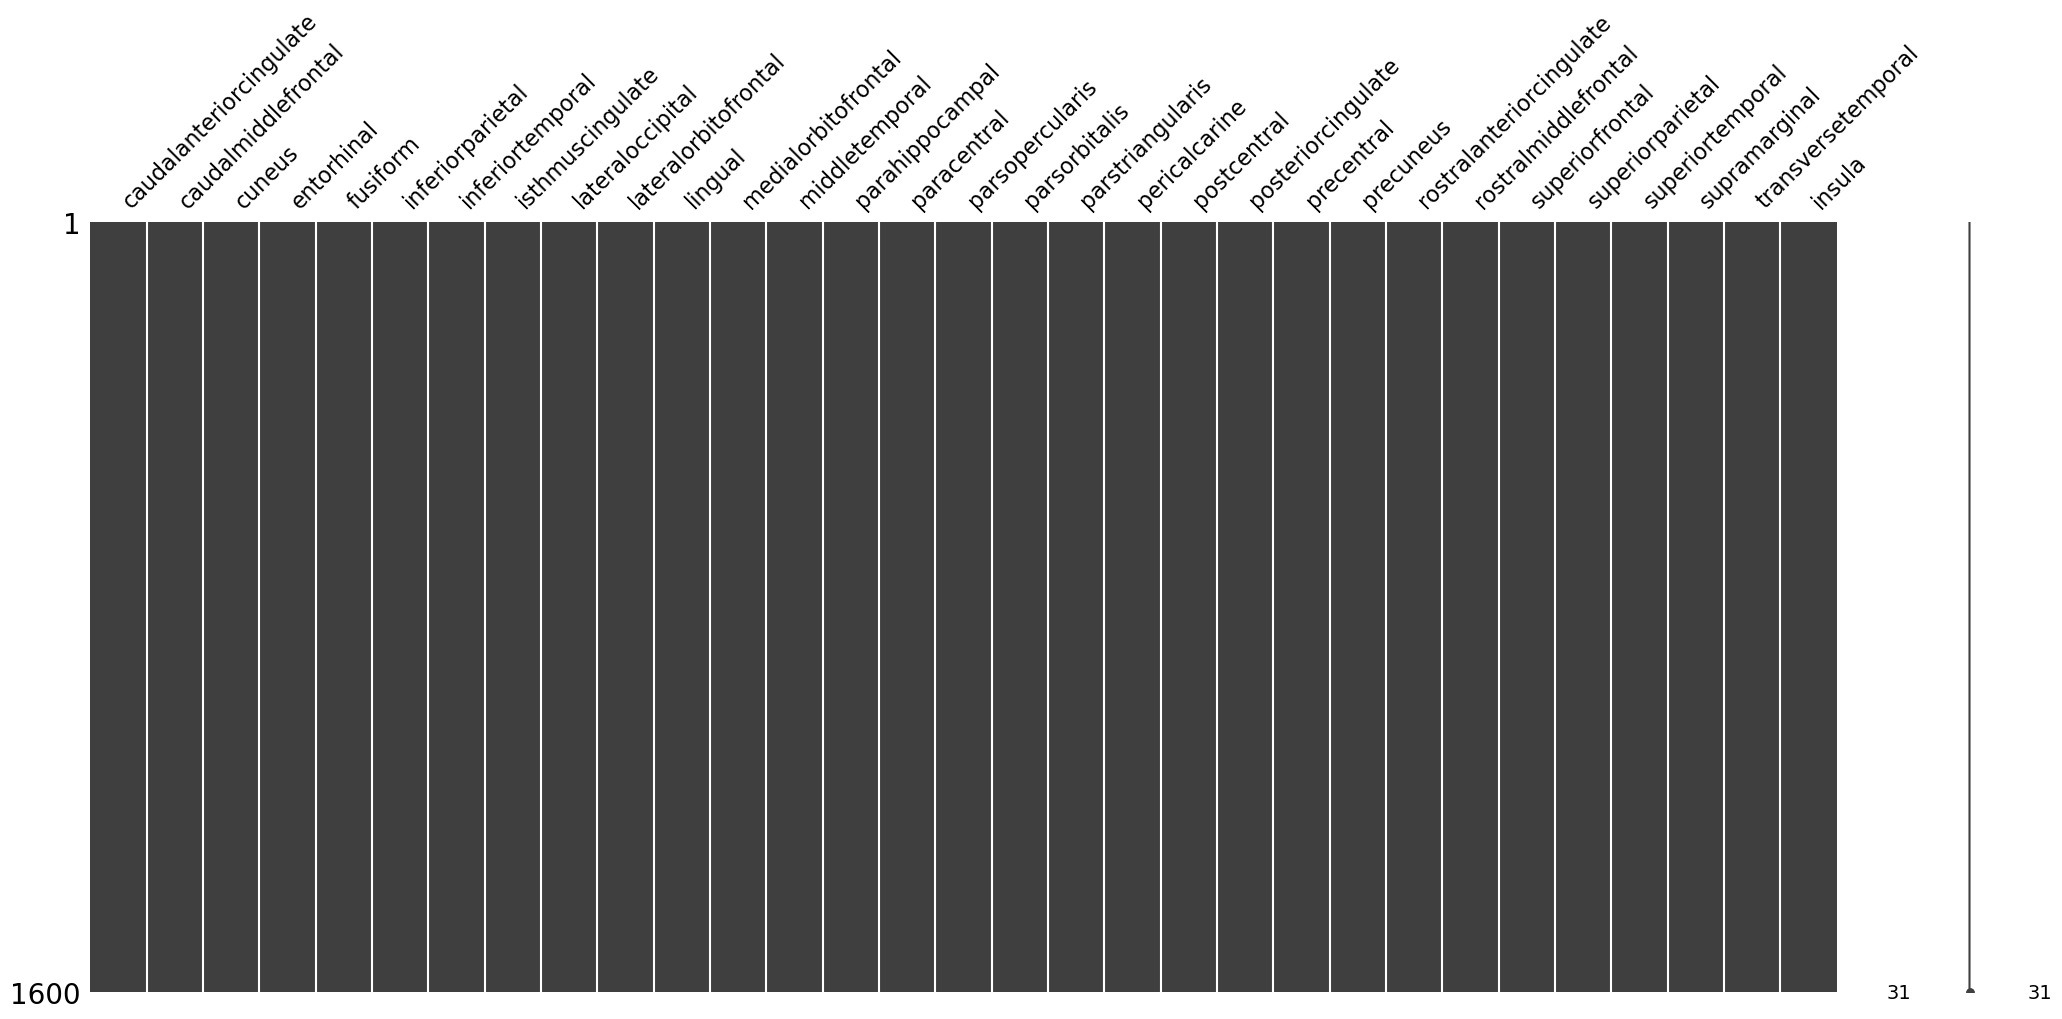

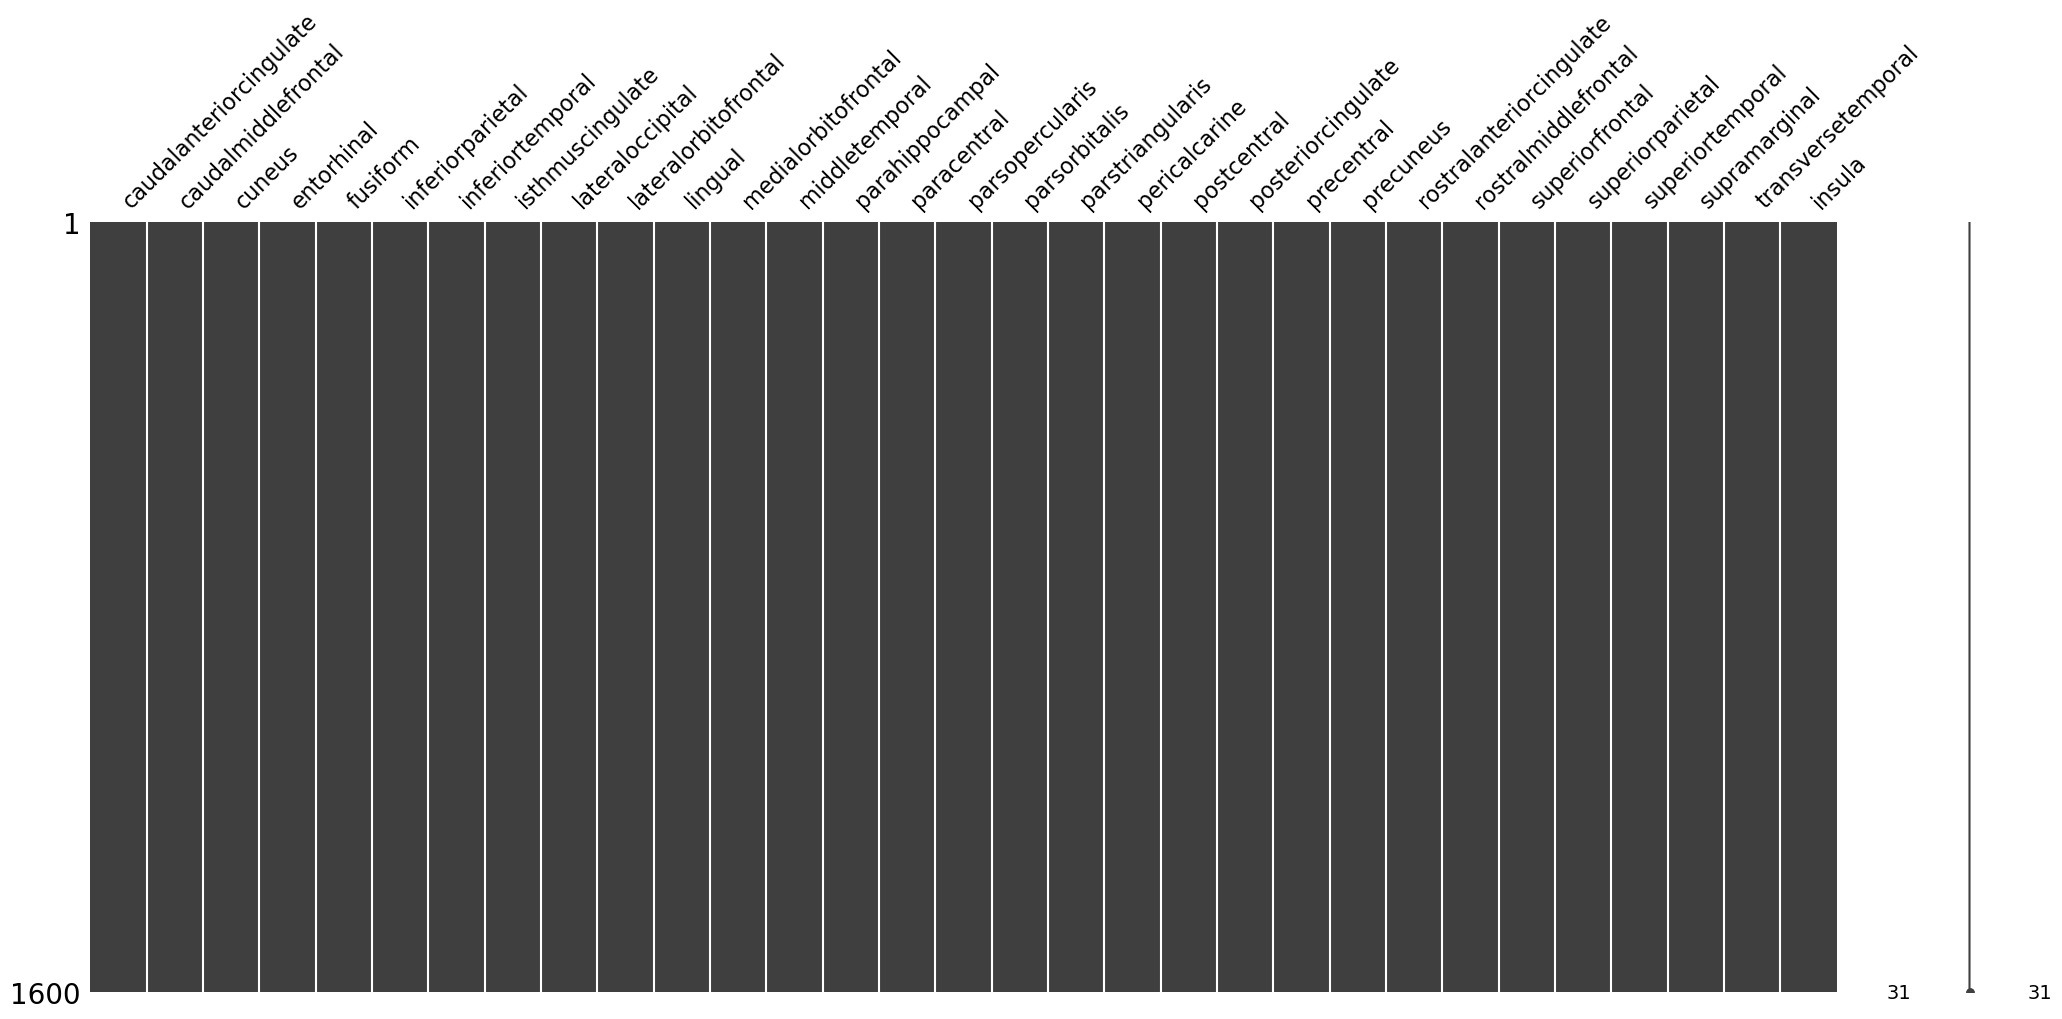

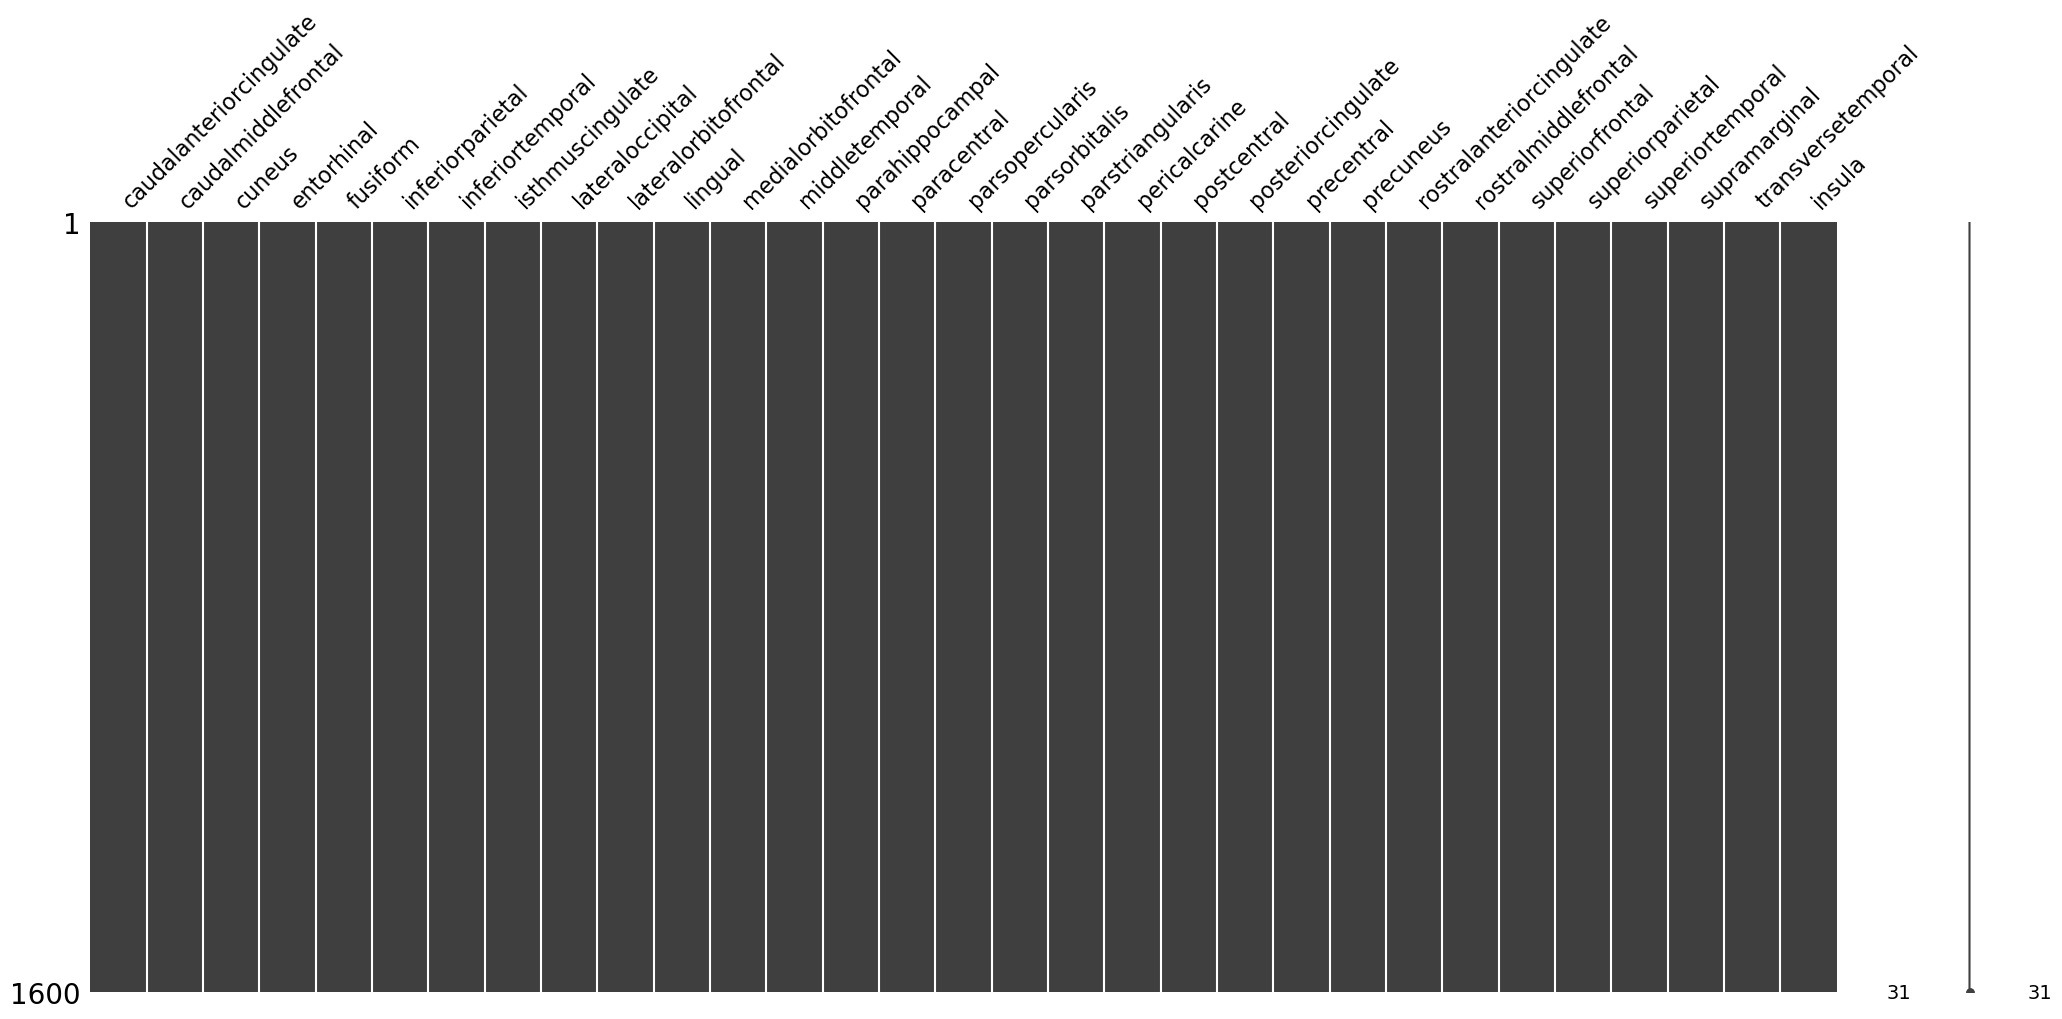

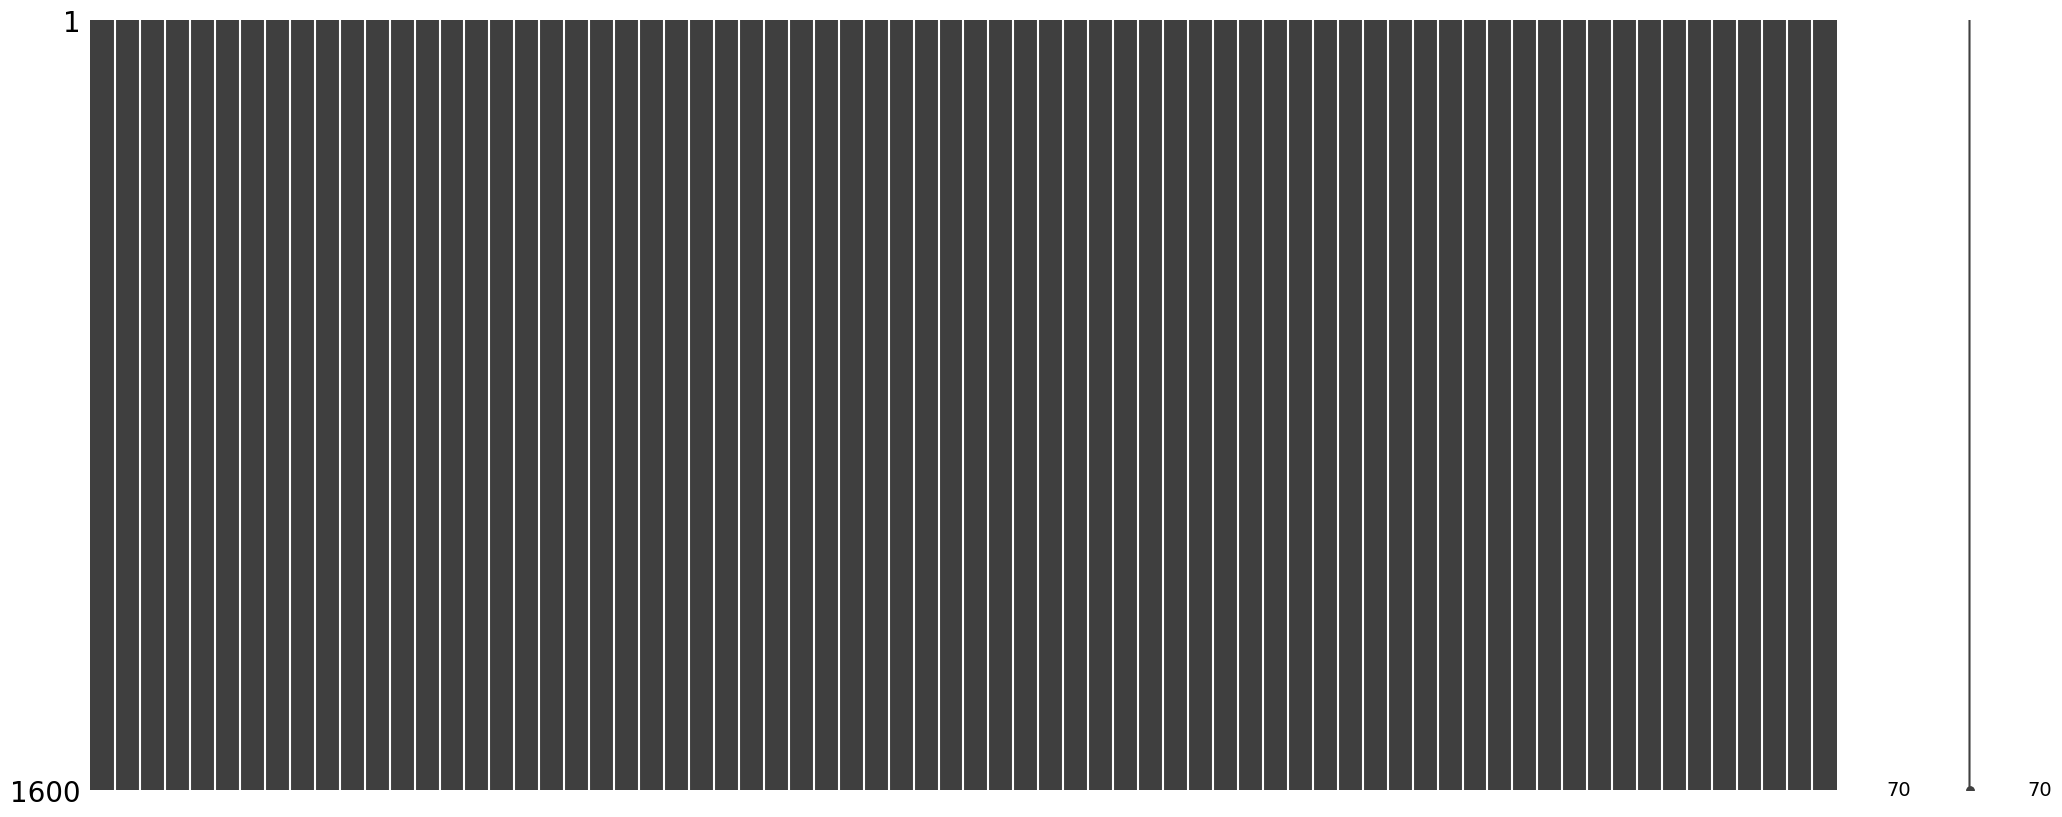

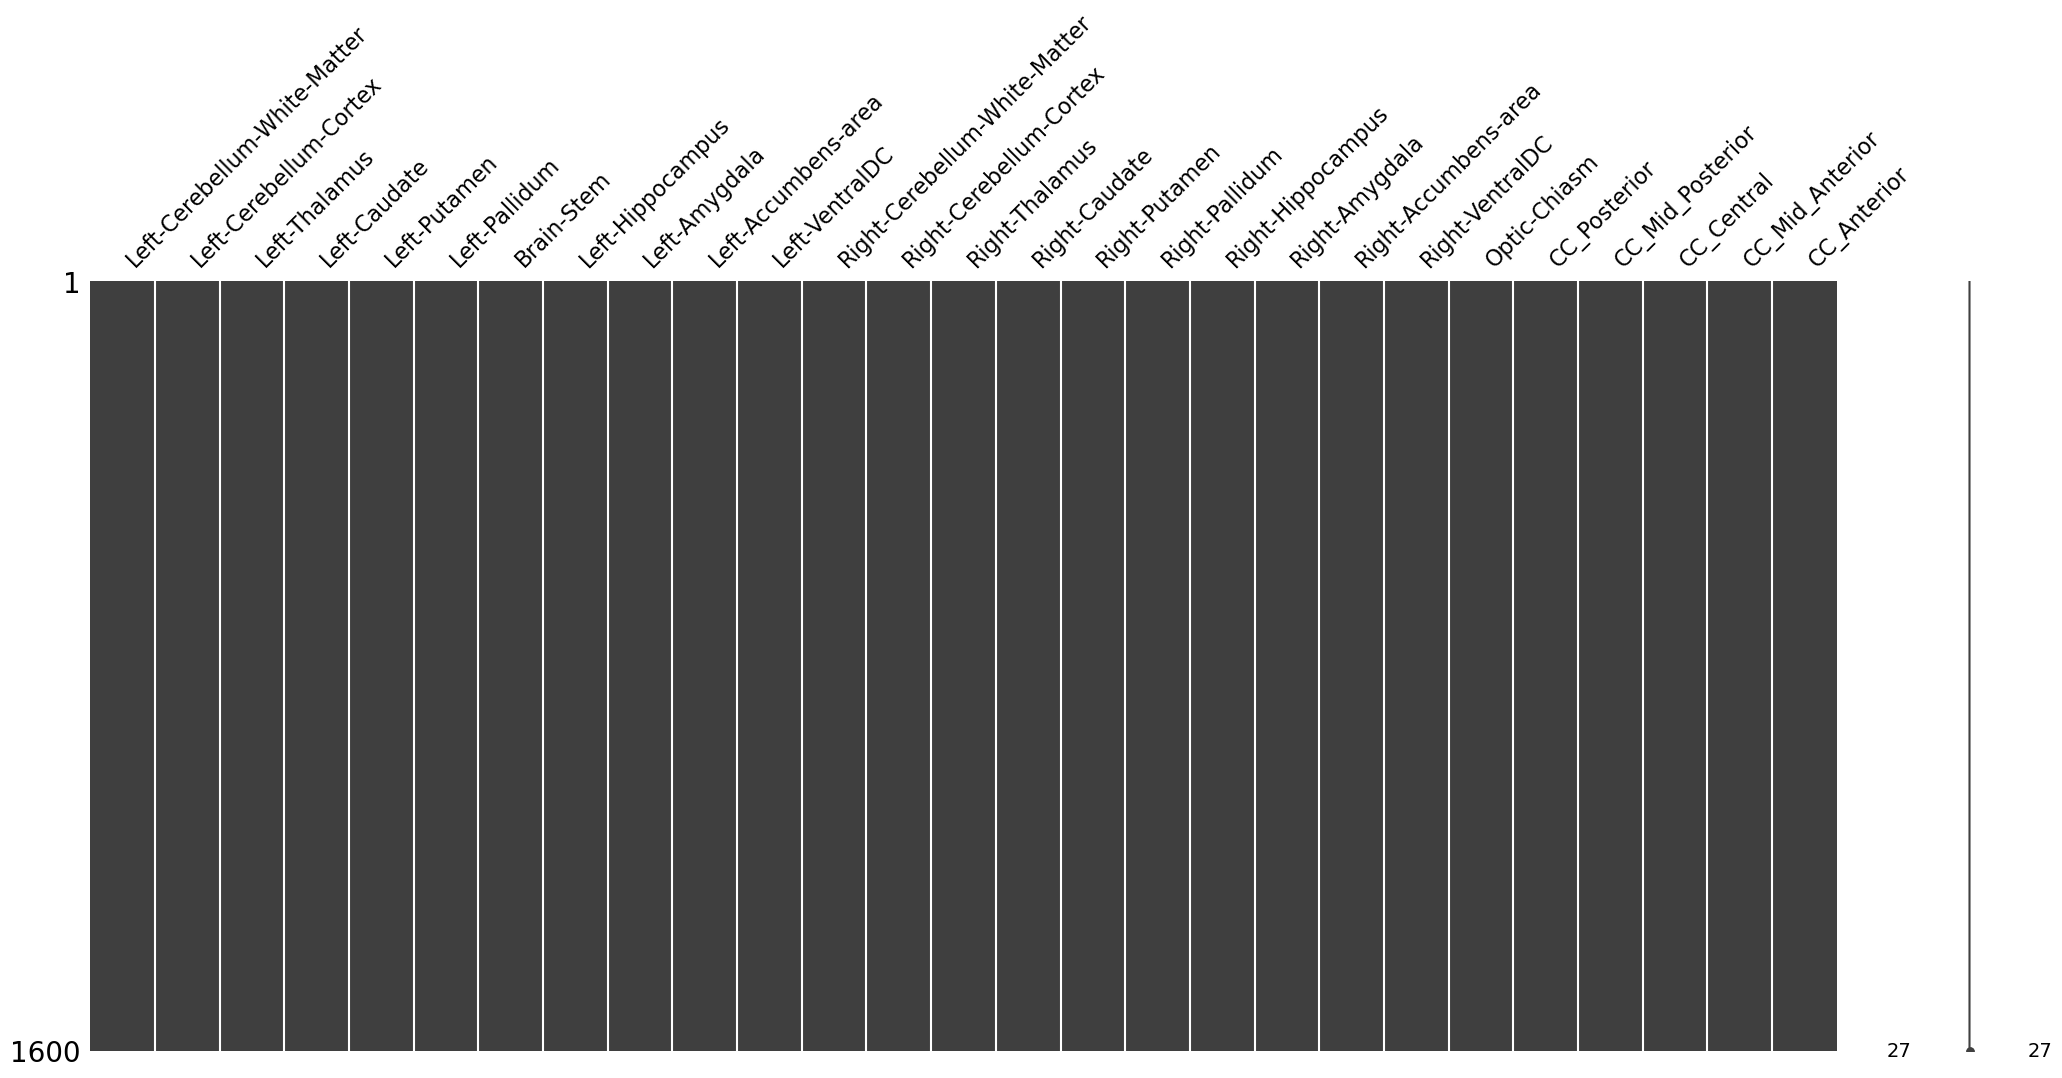

In [10]:
# use missingno to check the missing value
msno.matrix(original_x1)
msno.matrix(original_x2)
msno.matrix(original_x5)
msno.matrix(original_x6)
msno.matrix(original_x9)
msno.matrix(original_x11)
msno.matrix(original_x12)

#### Construct Non-Linear or Mixed Features to better the performance of models

In [5]:
# Min-Max Scale
original_x1 = (original_x1 - original_x1.min()) / (original_x1.max() - original_x1.min())
original_x2 = (original_x2 - original_x2.min()) / (original_x2.max() - original_x2.min())
original_x3 = (original_x3 - original_x3.min()) / (original_x3.max() - original_x3.min())
original_x4 = (original_x4 - original_x4.min()) / (original_x4.max() - original_x4.min())
original_x5 = (original_x5 - original_x5.min()) / (original_x5.max() - original_x5.min())
original_x6 = (original_x6 - original_x6.min()) / (original_x6.max() - original_x6.min())
original_x7 = (original_x7 - original_x7.min()) / (original_x7.max() - original_x7.min())
original_x8 = (original_x8 - original_x8.min()) / (original_x8.max() - original_x8.min())
original_x9 = (original_x9 - original_x9.min()) / (original_x9.max() - original_x9.min())
original_x10 = (original_x10 - original_x10.min()) / (original_x10.max() - original_x10.min())
original_x11 = (original_x11 - original_x11.min()) / (original_x11.max() - original_x11.min())
original_x12 = (original_x12 - original_x12.min()) / (original_x12.max() - original_x12.min())


# Construct mixed features to better the performance
original_x1, original_x2, original_x3, original_x4 = np.array(original_x1), np.array(original_x2), np.array(
    original_x3), np.array(original_x4)
original_x5, original_x6, original_x7, original_x8 = np.array(original_x5), np.array(original_x6), np.array(
    original_x7), np.array(original_x8)
original_x9, original_x10 = np.array(original_x9), np.array(original_x10)
original_x11, original_x12 = np.array(original_x11), np.array(original_x12)
original_y = np.array(original_y)

original_x_thick = (original_x5 + original_x7) * 0.5
original_x_gauscurv = (original_x2 + original_x4) * 0.5
original_x_meancurv = (original_x1 + original_x3) * 0.5
original_x_surfarea = (original_x6 + original_x8) * 0.5
original_x_grayvol = (original_x9 + original_x10) * 0.5
original_x_wmparc = original_x11
original_x_aseg = original_x12


original_x = np.hstack(
    [original_x_thick, original_x_gauscurv, original_x_meancurv, original_x_surfarea, original_x_grayvol,
        original_x_wmparc, original_x_aseg, original_x1, original_x2, original_x3, original_x4, original_x5,
        original_x6, original_x7, original_x8, original_x9, original_x10])

### ***2 Models***

***Construct different models to fit the processed data baseed. Mean Absolute Error(MAE) is used to evaluate the difference between predictions and labels.***

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

from sklearn.linear_model import LinearRegression, BayesianRidge

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
train_original_x, train_original_y = original_x, original_y


# 将数据集分为训练集和测试集
X_train, X_valid, y_train, y_valid = train_test_split(train_original_x, train_original_y, test_size=0.3, random_state=0)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_valid = torch.tensor(X_train, dtype=torch.float32)
y_valid = torch.tensor(y_train, dtype=torch.float32)

# linear models
print('\n RVR Model')

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model_valid_prediction = linear_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in linear_model_valid_prediction])))
print('\nVALID RESULT:{}'.format([int(i) for i in linear_model_valid_prediction]))
print('VALID Variance {}'.format(np.var([int(i) for i in linear_model_valid_prediction])))

rbf_model = BayesianRidge()
rbf_model.fit(X_train, y_train)
rbf_model_valid_prediction = rbf_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in rbf_model_valid_prediction])))
print('\nVALID RESULT:{}'.format([int(i) for i in rbf_model_valid_prediction]))
print('VALID Variance {}'.format(np.var([int(i) for i in rbf_model_valid_prediction])))




C:\Users\马培贤\AppData\Local\Temp\ipykernel_13396\3529373451.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid = torch.tensor(X_train, dtype=torch.float32)
C:\Users\马培贤\AppData\Local\Temp\ipykernel_13396\3529373451.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_valid = torch.tensor(y_train, dtype=torch.float32)



 RVR Model

VALID MAE:7.0339285714285715
VALID Variance 103.77057955994898

VALID MAE:8.2
VALID Variance 55.527180325255095
